<a href="https://colab.research.google.com/github/VishalPrem1994/AiGenPlayground/blob/main/Udemy_Course_1_Advanced_Stable_Diffusion_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prompts





- girl,RAW photo, best quality,realistic, photo-realistic, best quality ,masterpiece,an extremely delicate and beautiful, extremely detailed,2k wallpaper, Amazing, finely detail, 8k wallpaper,huge filesize , ultra-detailed, highres, extremely detailed,realistic, 8K, Ultra-High Definition, highest quality, ultra high resolution, (realistic:1.4), High quality texture,
- highly detailed full body, colour photograph of a girl super model,depth of field, moody light, dawn hour, style by Dan Winters, Russell James, Steve McCurry, centered, extremely detailed, Nikon D850, award winning photography
- teen full body, high definition, 8k, 35mm film color photography, photorealistic, insanely detailed, intricate, elegant, real human skin, insane detail, a coy, shy, alluring, evocative, stunning,
- (Best One) : a full body shot of a supermodel, fashion shoot, coy, shy, alluring, evocative, stunning, photo realistic, insanely detailed, intricate, elegant, 8k, depth of field, flawless skin, dazzling smile, flowing hair, gorgeous, breathtaking
- 1girl, a girl as a lifeguard, Standing with hands on hips, looking down at the ground, in the sun on a white lifeguard tower, Swim board, skinny, abs, ribs, flat chested, small breasts (perfect anatomy), (detailed eyebrows, beautiful eyes, realistic skin, detailed face:1. 3),A-line skirt,Rose gold hair, Straight hair,(intricately detailed post apocalyptic ruins ((intricately detailed rusty decayed overgrown building)) , ultra realistic, concept art, elegant, highly detailed, intricate, sharp focus, depth of field, f/1.8, 85mm, medium shot, mid shot, (centered image composition), (professionally color graded), ((bright soft diffused light)), volumetric fog, trending on instagram, trending on tumblr, hdr 4k, 8k , <lora:add_detail:0.5>
- ((best quality)), ((masterpiece)), (detailed), woman with green hair, holding a sword, (Artgerm inspired:1. 2), (pixiv contest winner:1. 1), (octopus goddess:1. 3), (Berserk art style:1. 2), close-up portrait, goddess skull, (Senna from League of Legends:1. 1), (Tatsumaki with green curly hair:1. 2), card game illustration, thick brush, HD anime wallpaper, (Akali from League of Legends:1. 1), 8k resolution
- (8k, RAW photo, best quality, masterpiece:1. 2), (realistic, photo-realistic:1. 37), ultra-detailed, full body, 1 girl, solo, beautiful detailed sky, detailed bedroom, night, beautiful detailed eyes, beautiful detailed lips, professional lighting, photon mapping, radiosity, physically-based rendering, extremely detailed eyes and face, beautiful detailed eyes, light on face, cinematic lighting, pyjamas, 1girl, full-body shot, looking at viewer, outdoors, ((white hair))
- bikini shot, super model,flawless skin, cascading hair, gorgeous, breath taking,HD, insanely detailed, 8k, elegant,stunning, photo realistic,   color photography, depth of field,

- Whole body photo of a gorgeous lady wearing skimpy nighties on the bed, seductive smile, daytime, deep photography, Ilford HP5 film, b&w, crushed blacks, depth of field, dark photo, film grain, shadows, natural light

- 1 girl, a Beautiful idol, (Cute Loose Bob hair), (casual clothes), (showing midriff), (toned stomach), (small breasts), (bedroom), symmetrical eyes, ultra highres, photorealistic, 8k, hyperrealism, dramatic lighting, photography, physics-based rendering, ((full body)), best quality, ((realistic photo)), (detailed face), (8k, RAW photo, highest quality, masterpiece), High detail RAW color photo professional close-up

### Negative Prompt



- illustration, 3d, sepia, painting, cartoons, sketch, (worst quality:2), (low quality:2), (normal quality:2), lowres, bad anatomy, bad hands, normal quality, ((monochrome)), ((grayscale:1.2)),newhalf, collapsed eyeshadow, multiple eyebrows, pink hair, analog, analogphoto, long neck
- EasyNegative, lowres, ((monochrome)), ((grayscale)),skin spots, ((out of frame)), ((out of focus)), acnes, skin blemishes, age spot, glans, extra head,wrong eyes, extra fingers,fewer fingers,strange fingers,bad hand,signature, watermark, username, blurry, bad feet,bad leg, duplicate, extra limb, ugly, disgusting, poorly drawn hands, missing limb, floating limbs, disconnected limbs, malformed hands, blurry,mutated hands and fingers, (worst quality:2), (low quality:2), (normal quality:2), ugly anatomy, distorted limb, smuged fingers hands,
- (epicnegative:0.9), watermark, signature, bad anatomy, mutation, deformed, NSFW, Asian, Chinese

- EasyNegative, lowres, ((monochrome)), ((grayscale)),skin spots, ((out of frame)), ((out of focus)), skin blemishes, age spot, glans, extra head,wrong eyes, extra fingers,fewer fingers,strange fingers,bad hand,signature, watermark, username, blurry, bad feet,bad leg, duplicate, extra limb, ugly, disgusting, poorly drawn hands, missing limb, floating limbs, disconnected limbs, malformed hands, blurry,mutated hands and fingers, ugly anatomy, distorted limb, smuged fingers hands, watermark, signature, bad anatomy, mutation, deformed, NSFW, Asian, Chinese

### Login to HuggingFace 🤗

In [1]:
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers diffusers



#@markdown You need to accept the model license before downloading or using the Stable Diffusion weights. Please, visit the [model card](https://huggingface.co/runwayml/stable-diffusion-v1-5), read the license and tick the checkbox if you agree. You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work.

#@markdown Dimensions for rendered photos
#@markdown - 768X512
#@markdown - 1536x1024
#@markdown - 2048x1280
#@markdown - 2560x1536
#@markdown - 3072x1800


# https://huggingface.co/settings/tokens
!mkdir -p ~/.huggingface
HUGGINGFACE_TOKEN = "<put your own token from HuggingFace Website>" #@param {type:"string"}
!echo -n "{HUGGINGFACE_TOKEN}" > ~/.huggingface/token

import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display
torch.cuda.empty_cache()
g_cuda = torch.Generator(device='cuda')
#model_id = "prompthero/openjourney"
model_id = "stabilityai/stable-diffusion-2-1-base"

#model_id = "KrakExilios/NSFW_LORA"
device = "cuda"
seed = 99340
g_cuda.manual_seed(seed)

pipe = StableDiffusionPipeline.from_pretrained(model_id,torch_dtype=torch.float16)
pipe = pipe.to(device)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 32.2 MB/s eta 0:00

/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:105: UserWarning: /usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('http'), PosixPath('//172.28.0.1'), PosixPath('8013')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc48301118ce562b961b3c22d803539adc1e0c19/gpu-t4-s-2vqcm84kbe3g9 -

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

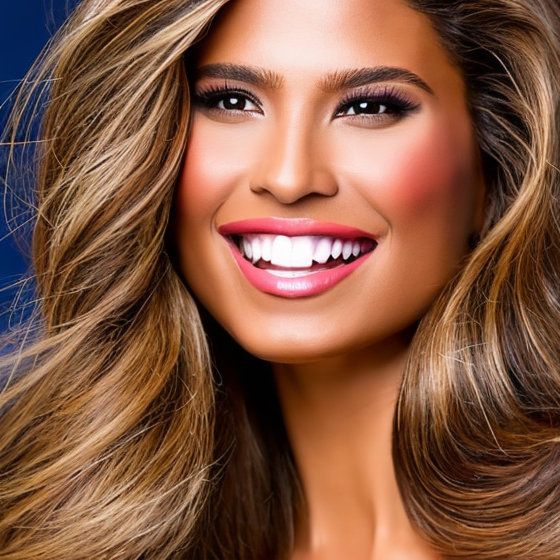

In [5]:
#@markdown Giving Descriptions
prompt = "a full body shot of a supermodel, fashion shoot, coy, shy, alluring, evocative, stunning, photo realistic, insanely detailed, intricate, elegant, 8k, depth of field, flawless skin, dazzling smile, flowing hair, gorgeous, breathtaking"#@param {type:"string"}
negative_prompt = "EasyNegative, lowres, ((monochrome)), ((grayscale)),skin spots, ((out of frame)), ((out of focus)), age spot, glans, extra head,wrong eyes, extra fingers,fewer fingers,strange fingers,bad hand,signature, watermark, username, blurry, bad feet,bad leg, duplicate, extra limb, ugly, disgusting, poorly drawn hands, missing limb, floating limbs, disconnected limbs, malformed hands, blurry,mutated hands and fingers, ugly anatomy, distorted limb, smuged fingers hands, watermark, signature, bad anatomy, mutation, deformed, Asian, Chinese" #@param {type:"string"}
#@markdown Image Details
num_samples = 1
height = 560 #@param {type:"number"}
width = 560 #@param {type:"number"}
#@markdown Additional Settings
guidance_scale = 8 #@param {type:"number"}
num_inference_steps = 80 #@param {type:"number"}

images = pipe(
    prompt,
    height=height,
    width=width,
    negative_prompt=negative_prompt,
    num_images_per_prompt=num_samples,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    ).images

for img in images:
    display(img)